# pandas exploration
In this assignment you will select a data set and do some munging and analysis of it using `pandas`, Jupyter Notebooks, and associated Python-centric data science tools.

## Set up environment

The following lines ensure that `numpy` and `pandas` are installed in the notebook environment.  Depending on your system, this may not be necessary and may be removed.

In [53]:
!pip install numpy
!pip install pandas

Import the core data science libraries:

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Import the raw data
In this section, you will import the raw data into a `pandas` DataFrame.

In [3]:
# place your code into this Code cell
df = pd.read_csv('data/data.csv')

## Data inspection
In this section, you will show enough of your data for a viewer to get a general sense of how the data is structured and any unique features of it.  Complete each of the indicated tasks in a Code cell, making sure to include a Markdown cell above each Code cell that explains what is being shown by the code.  
- Show 5 rows, selected at random, from the data set.
- Show each of the column names and their data types.
- Show any unique features of your chosen data set.

Feel free to add as many additional cells as you need to help explain the raw data.

1. Show 5 rows randomly

In [5]:
df.sample(5)

,Year,Leading Cause,Sex,Race Ethnicity,Deaths,Death Rate,Age Adjusted Death Rate
317,2012,Septicemia (A40-A41),M,Other Race/ Ethnicity,6,.,.
43,2010,Cerebrovascular Disease (Stroke: I60-I69),M,Hispanic,140,12.3,21.4
942,2008,"Chronic Liver Disease and Cirrhosis (K70, K73)",F,Other Race/ Ethnicity,.,.,.
275,2014,Human Immunodeficiency Virus Disease (HIV: B20...,M,Hispanic,92,7.7,8.7
104,2008,"Assault (Homicide: Y87.1, X85-Y09)",M,Other Race/ Ethnicity,5,.,.


2. Show eache of the column names and their data types

In [6]:
df.dtypes

Year                        int64
Leading Cause              object
Sex                        object
Race Ethnicity             object
Deaths                     object
Death Rate                 object
Age Adjusted Death Rate    object
dtype: object

3. Show unique features of the data set

a.  Leading Causes of Death Distribution  
This step focuses on understanding the different categories within the 'Leading Cause' column. By counting the occurrences of each cause of death, we can identify the most common and the least common causes recorded in the dataset.

In [7]:
leading_cause_distribution = df['Leading Cause'].value_counts()
leading_cause_distribution

Leading Cause
Influenza (Flu) and Pneumonia (J09-J18)                                                                                              96
Diseases of Heart (I00-I09, I11, I13, I20-I51)                                                                                       96
Malignant Neoplasms (Cancer: C00-C97)                                                                                                96
All Other Causes                                                                                                                     96
Diabetes Mellitus (E10-E14)                                                                                                          92
Cerebrovascular Disease (Stroke: I60-I69)                                                                                            90
Chronic Lower Respiratory Diseases (J40-J47)                                                                                         88
Accidents Except Drug Posioning (V

b.  Gender Distribution  
Here, we're examining the 'Sex' column to see how the records are distributed between different genders. It provides a basic demographic breakdown and helps us understand if there's a balance between genders within the dataset.

In [8]:
sex_distribution = df['Sex'].value_counts()
sex_distribution

Sex
F    554
M    540
Name: count, dtype: int64

c.  Race and Ethnicity Distribution
The 'Race Ethnicity' column categorizes the data by race and ethnicity. Analyzing this column shows the demographic diversity of the dataset and highlights the representation of various racial and ethnic groups.

In [9]:
race_ethnicity_distribution = df['Race Ethnicity'].value_counts()
race_ethnicity_distribution

Race Ethnicity
Not Stated/Unknown            200
Other Race/ Ethnicity         186
Black Non-Hispanic            178
Hispanic                      177
Asian and Pacific Islander    177
White Non-Hispanic            176
Name: count, dtype: int64

d.  Year Distribution
By looking at the 'Year' column, we can evaluate the dataset across different time points. This helps us see if certain years have more records than others, which might be indicative of changes in data collection methods or actual trends in mortality.

In [10]:
year_distribution = df['Year'].value_counts()
year_distribution

Year
2011    141
2007    141
2010    138
2008    136
2014    136
2009    135
2012    134
2013    133
Name: count, dtype: int64

e.  Deaths Statistics
In this step, we perform a statistical analysis on the 'Deaths' column, which provides insights into the quantitative aspect of the data such as the total number of deaths recorded, average, range, etc.

In [11]:
deaths_statistics = df['Deaths'].describe()
deaths_statistics

count     1094
unique     465
top          .
freq       138
Name: Deaths, dtype: object

## Data munging
Place your **data munging** code and documentation within this section.  
- Keep each of your Code cells short and focused on a single task.  
- Include a Markdown cell above each code cell that describes what task the code within the code cell is performing.
- Make as many code cells as you need to complete the munging - a few have been created for you to start with.
- Display 5 sample rows of the modified data after each transformation so a viewer can see how the data has changed.

**Note**: If you believe that your data set does not require any munging, please explain in detail.  Create Markdown cells that explain your thinking and create Code cells that show any specific structures of the data you refer to in your explanation.

1. Convert Placeholders to NaN  
Non-numeric placeholders like periods ('.') are not automatically recognized as missing values. Converting these to NaN ensures that all missing data is uniformly recognized by pandas.

In [12]:
df.replace('.', pd.NA, inplace=True)

2. Remove rows with missing values  
After converting placeholders to NaN, we use dropna() to remove any rows that contain missing values, ensuring that the dataset only contains complete records.

In [13]:
# Remove all rows with missing values now that placeholders have been converted
df.dropna(inplace=True)

# Display 5 sample rows of the data after removing missing values
df.sample(5)

,Year,Leading Cause,Sex,Race Ethnicity,Deaths,Death Rate,Age Adjusted Death Rate
729,2013,Influenza (Flu) and Pneumonia (J09-J18),M,Asian and Pacific Islander,102,18.4,26.8
1085,2014,Malignant Neoplasms (Cancer: C00-C97),F,Hispanic,1154,91.1,97.4
690,2011,"Intentional Self-Harm (Suicide: X60-X84, Y87.0)",M,White Non-Hispanic,177,13.3,12
524,2007,Cerebrovascular Disease (Stroke: I60-I69),M,Hispanic,126,11.6,20
717,2009,Diabetes Mellitus (E10-E14),F,Black Non-Hispanic,384,36.7,33.7


3. Correct Data Types
Convert the 'Deaths', 'Death Rate', and 'Age Adjusted Death Rate' columns to numeric types, as they are currently object types possibly due to the presence of non-numeric characters.

In [14]:
df['Deaths'] = pd.to_numeric(df['Deaths'], errors='coerce')
df['Death Rate'] = pd.to_numeric(df['Death Rate'], errors='coerce')
df['Age Adjusted Death Rate'] = pd.to_numeric(df['Age Adjusted Death Rate'], errors='coerce')
df.sample(5)

,Year,Leading Cause,Sex,Race Ethnicity,Deaths,Death Rate,Age Adjusted Death Rate
466,2014,"Assault (Homicide: Y87.1, X85-Y09)",M,Black Non-Hispanic,186,21.5,21.5
860,2014,Influenza (Flu) and Pneumonia (J09-J18),M,White Non-Hispanic,502,37.4,29.7
20,2014,"Nephritis, Nephrotic Syndrome and Nephrisis (N...",F,Black Non-Hispanic,90,8.6,7.1
982,2007,Influenza (Flu) and Pneumonia (J09-J18),F,Asian and Pacific Islander,58,11.3,15.8
176,2008,Malignant Neoplasms (Cancer: C00-C97),M,White Non-Hispanic,3361,250.4,214.3


4. Create New Columns if needed
If the dataset analysis would benefit from additional columns, such as a categorization of the 'Death Rate' into low, medium, and high, create these columns.

In [15]:
bins = [0, 10, 20, float('inf')]
labels = ['Low', 'Medium', 'High']
df['Death Rate Category'] = pd.cut(df['Death Rate'], bins=bins, labels=labels)
df.sample(5)

,Year,Leading Cause,Sex,Race Ethnicity,Deaths,Death Rate,Age Adjusted Death Rate,Death Rate Category
725,2012,All Other Causes,M,White Non-Hispanic,2316,172.9,145.7,High
1039,2010,Alzheimer's Disease (G30),F,White Non-Hispanic,247,17.3,7.5,Medium
763,2013,Chronic Lower Respiratory Diseases (J40-J47),F,Asian and Pacific Islander,27,4.5,5.2,Low
326,2013,Malignant Neoplasms (Cancer: C00-C97),F,White Non-Hispanic,3187,224.2,153.3,High
459,2011,Essential Hypertension and Renal Diseases (I10...,M,White Non-Hispanic,142,10.6,8.8,Medium


## Data analysis
Place your **data analysis** code and documentation within this section.
- Perform at least 5 different statistical or other analyses of different aspects of the data.
    - Your analyses must be specific and relevant to your chosen data set and show interesting aspects of it.
    - Include at least one analysis that includes grouping rows by a shared attribute and performing some kind of statistical analysis on each group.
    - Sort the data in at least 1 of your analyses, but sort on its own does not constitute an analysis on its own.
- Keep each of your Code cells short and focused on a single task.
- Include a Markdown cell above each Code cell that describes what task the code within the Code cell is performing.
- Make as many code cells as you need to complete the analysis - a few have been created for you to start with.

**1. Analysis of Death Causes: Group by 'Leading Cause' and calculate the total number of deaths and average death rate for each cause.**

In [16]:
# Analysis of Death Causes: Group by 'Leading Cause' and calculate the total number of deaths and average death rate for each cause.

# Grouping data by 'Leading Cause'
cause_group = df.groupby('Leading Cause').agg(
    Total_Deaths=pd.NamedAgg(column='Deaths', aggfunc='sum'),
    Average_Death_Rate=pd.NamedAgg(column='Death Rate', aggfunc='mean')
).reset_index()

# Sorting by Total Deaths to see the most deadly causes
cause_group.sort_values(by='Total_Deaths', ascending=False, inplace=True)
cause_group.head()


,Leading Cause,Total_Deaths,Average_Death_Rate
10,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",145354,199.351562
15,Malignant Neoplasms (Cancer: C00-C97),105051,149.796875
1,All Other Causes,76672,109.010937
13,Influenza (Flu) and Pneumonia (J09-J18),18433,25.889062
9,Diabetes Mellitus (E10-E14),13564,20.287500


**2. Analyze the trend of total deaths and death rates over the years.**

In [17]:
#Analyze the trend of total deaths and death rates over the years.

# Grouping data by 'Year'
year_group = df.groupby('Year').agg(
    Total_Deaths=pd.NamedAgg(column='Deaths', aggfunc='sum'),
    Average_Death_Rate=pd.NamedAgg(column='Death Rate', aggfunc='mean')
).reset_index()

# Sorting data by year for proper trend visualization
year_group.sort_values(by='Year', inplace=True)
year_group

,Year,Total_Deaths,Average_Death_Rate
0,2007,53396,53.824444
1,2008,53437,54.294382
2,2009,52198,52.956180
3,2010,51924,53.250000
4,2011,52191,53.748864
5,2012,51634,53.064773
6,2013,52125,53.389773
7,2014,51855,52.969318


**3. Comparison by Sex: Compare the average death rate by sex for each leading cause of death.**

In [18]:
# Comparison by Sex: Compare the average death rate by sex for each leading cause of death.

# Grouping data by 'Leading Cause' and 'Sex'
sex_comparison = df.groupby(['Leading Cause', 'Sex']).agg(
    Average_Death_Rate=pd.NamedAgg(column='Death Rate', aggfunc='mean')
).reset_index()

# Sorting the data by leading cause and sex
sex_comparison.sort_values(by=['Leading Cause', 'Sex'], inplace=True)
sex_comparison.head(10)


,Leading Cause,Sex,Average_Death_Rate
0,"Accidents Except Drug Posioning (V01-X39, X43,...",F,7.944000
1,"Accidents Except Drug Posioning (V01-X39, X43,...",M,15.964516
2,All Other Causes,F,102.853125
3,All Other Causes,M,115.168750
4,Alzheimer's Disease (G30),F,10.286957
5,"Assault (Homicide: Y87.1, X85-Y09)",M,26.788889
6,Cerebrovascular Disease (Stroke: I60-I69),F,20.881250
7,Cerebrovascular Disease (Stroke: I60-I69),M,16.806250
8,Certain Conditions originating in the Perinata...,F,3.200000
9,Certain Conditions originating in the Perinata...,M,3.600000


**4. Ethnicity Analysis: Summarize deaths and death rates by ethnicity, identifying which ethnic groups are most affected by different causes.**

In [19]:
# Ethnicity Analysis: Summarize deaths and death rates by ethnicity, identifying which ethnic groups are most affected by different causes.

# Grouping data by 'Leading Cause' and 'Race Ethnicity'
ethnicity_analysis = df.groupby(['Leading Cause', 'Race Ethnicity']).agg(
    Total_Deaths=pd.NamedAgg(column='Deaths', aggfunc='sum'),
    Average_Death_Rate=pd.NamedAgg(column='Death Rate', aggfunc='mean')
).reset_index()

# Sorting the data by leading cause and total deaths for each ethnicity
ethnicity_analysis.sort_values(by=['Leading Cause', 'Total_Deaths'], ascending=False, inplace=True)
ethnicity_analysis.head(10)


,Leading Cause,Race Ethnicity,Total_Deaths,Average_Death_Rate
60,Viral Hepatitis (B15-B19),Asian and Pacific Islander,15,2.500000
59,Septicemia (A40-A41),White Non-Hispanic,473,8.325000
57,Septicemia (A40-A41),Black Non-Hispanic,89,8.500000
58,Septicemia (A40-A41),Hispanic,49,4.200000
56,Septicemia (A40-A41),Asian and Pacific Islander,16,2.700000
54,"Nephritis, Nephrotic Syndrome and Nephrisis (N...",Black Non-Hispanic,574,7.842857
53,"Nephritis, Nephrotic Syndrome and Nephrisis (N...",Asian and Pacific Islander,90,3.280000
55,"Nephritis, Nephrotic Syndrome and Nephrisis (N...",White Non-Hispanic,89,6.200000
52,Mental and Behavioral Disorders due to Acciden...,White Non-Hispanic,2295,15.436364
51,Mental and Behavioral Disorders due to Acciden...,Hispanic,1511,11.918182


**5. High Death Rate Analysis: Identify cases with 'High' death rates and sort by deaths to see the most severe instances.**

In [20]:
# High Death Rate Analysis: Identify cases with 'High' death rates and sort by deaths to see the most severe instances.

# Filtering data for 'High' death rate category
high_death_rate_cases = df[df['Death Rate Category'] == 'High']

# Sorting the filtered data by 'Deaths' in descending order
high_death_rate_cases_sorted = high_death_rate_cases.sort_values(by='Deaths', ascending=False)
high_death_rate_cases_sorted.head(10)


,Year,Leading Cause,Sex,Race Ethnicity,Deaths,Death Rate,Age Adjusted Death Rate,Death Rate Category
325,2007,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",F,White Non-Hispanic,7050,491.4,250.7,High
461,2008,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",F,White Non-Hispanic,6836,476.2,245.5,High
189,2009,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",F,White Non-Hispanic,6297,438.3,226.2,High
606,2007,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",M,White Non-Hispanic,5632,421.0,350.7,High
105,2008,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",M,White Non-Hispanic,5503,410.0,342.3,High
1016,2010,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",F,White Non-Hispanic,5351,374.2,189.2,High
522,2009,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",M,White Non-Hispanic,5168,384.2,319.8,High
685,2011,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",F,White Non-Hispanic,5016,354.1,179.8,High
200,2012,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",F,White Non-Hispanic,4719,332.7,167.7,High
131,2013,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",F,White Non-Hispanic,4535,319.0,160.6,High


## Data visualization
In this section, you will create a few **visualizations** that show some of the insights you have gathered from this data.
- Create at least 5 different visualizations, where each visualization shows different insights into the data.
- Use at least 3 different visualization types (e.g. bar charts, line charts, stacked area charts, pie charts, etc)
- Create a Markdown cell and a Code cell for each, where you explain and show the visualizations, respectively.
- Create as many additional cells as you need to prepare the data for the visualizations.

**1. Bar Chart of Total Deaths by Leading Cause**
* This bar chart displays the total deaths for each leading cause of mortality, helping to easily identify the most lethal health issues in the dataset.


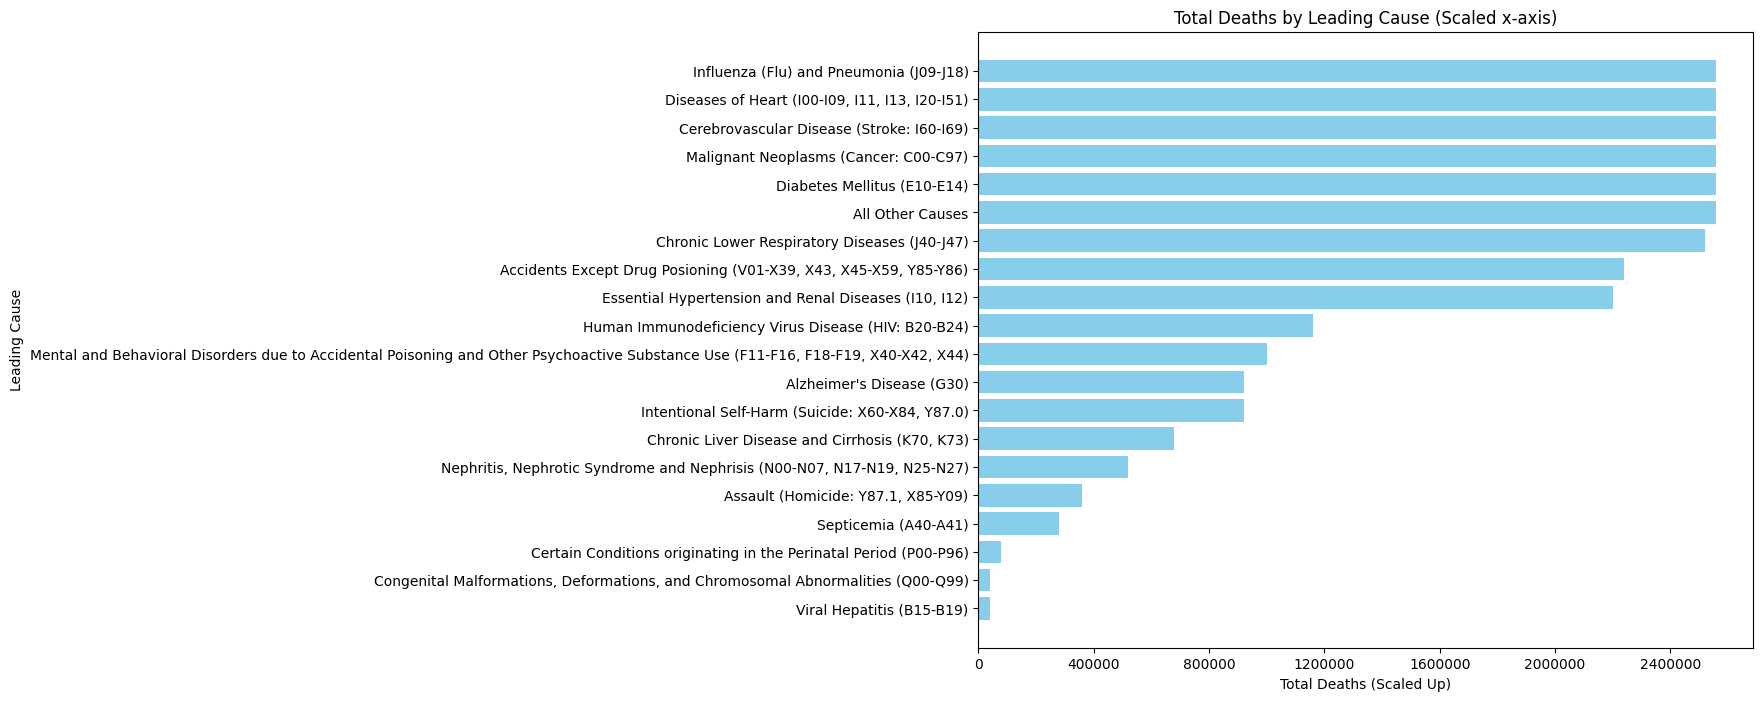

In [45]:
# Create the bar chart
plt.figure(figsize=(10, 8))
plt.barh(cause_counts.index, cause_counts.values, color='skyblue')

# Create a function to multiply x-axis values by 100 for the label
def scale_x(value, pos):
    return '{}'.format(int(value * 40000))

# Get current axis
ax = plt.gca()

# Set the formatter for the x-axis
ax.xaxis.set_major_formatter(plt.FuncFormatter(scale_x))

plt.xlabel('Total Deaths (Scaled Up)')
plt.ylabel('Leading Cause')
plt.title('Total Deaths by Leading Cause (Scaled x-axis)')
plt.show()

**2. Line Chart of Death Trends Over Years**
* This line chart provides a dual perspective on both the total number of deaths and the average death rate from 2007 to 2014, offering insights into trends and fluctuations over the period.

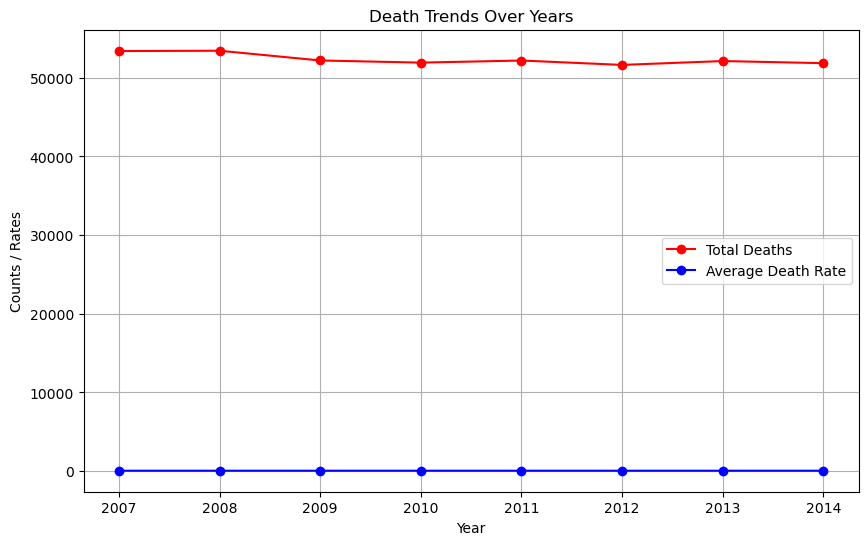

In [28]:
# Preparing data for the Line Chart of Death Trends Over Years
year_group_viz = df.groupby('Year').agg(
    Total_Deaths=pd.NamedAgg(column='Deaths', aggfunc='sum'),
    Average_Death_Rate=pd.NamedAgg(column='Death Rate', aggfunc='mean')
).reset_index()

# Creating the line chart for Death Trends Over Years
plt.figure(figsize=(10, 6))
plt.plot(year_group_viz['Year'], year_group_viz['Total_Deaths'], label='Total Deaths', marker='o', color='red')
plt.plot(year_group_viz['Year'], year_group_viz['Average_Death_Rate'], label='Average Death Rate', marker='o', color='blue')
plt.xlabel('Year')
plt.ylabel('Counts / Rates')
plt.title('Death Trends Over Years')
plt.legend()
plt.grid(True)
plt.show()


**3.Stack Area Chart of trends of deaths by gender**
* This stacked area chart visualizes the number of deaths split by gender over an eight-year period. Each segment's height at any point along the horizontal (time) axis represents the number of deaths for that gender at that time, with the total height representing the combined total deaths. The color differentiation provides a clear visual distinction between male and female deaths, illustrating the proportion that each gender contributes to the total number of deaths over time.

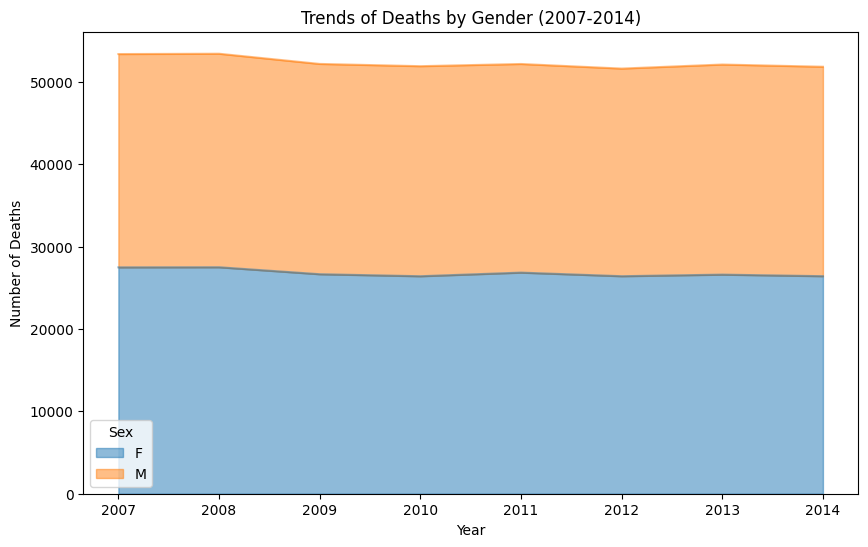

In [46]:
# Group data by year and sex, and sum deaths
gender_trends_pandas = df.groupby(['Year', 'Sex'])['Deaths'].sum().unstack()

# Plotting the stacked area chart using pandas plotting
gender_trends_pandas.plot(kind='area', stacked=True, alpha=0.5, figsize=(10, 6), title='Trends of Deaths by Gender (2007-2014)')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.legend(title='Sex')
plt.show()

**4.Pie Chart of Death Distribution by Sex for "Diseases of Heart"**
* This pie chart will help visualize the proportion of deaths due to heart diseases between males and females, highlighting potential gender disparities in mortality rates.

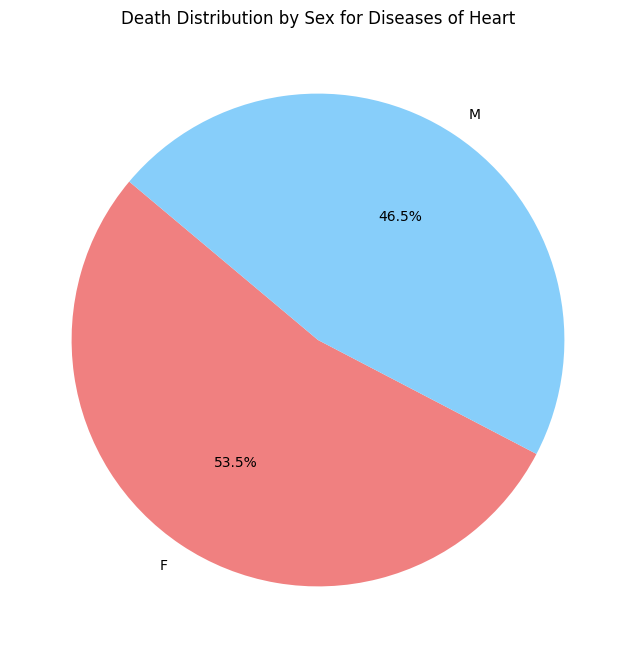

In [47]:
# Preparing data for the Pie Chart of Death Distribution by Sex for "Diseases of Heart"
heart_disease_sex_distribution = df[df['Leading Cause'] == 'Diseases of Heart (I00-I09, I11, I13, I20-I51)'].groupby('Sex').agg(
    Total_Deaths=pd.NamedAgg(column='Deaths', aggfunc='sum')
).reset_index()

heart_disease_sex_distribution

# Creating the pie chart for Death Distribution by Sex for "Diseases of Heart"
colors = ['lightcoral', 'lightskyblue']
plt.figure(figsize=(8, 8))
plt.pie(heart_disease_sex_distribution['Total_Deaths'], labels=heart_disease_sex_distribution['Sex'], colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Death Distribution by Sex for Diseases of Heart')
plt.show()


**5.Stacked Bar Chart of Deaths by Ethnicity for Top Causes**
* This visualization will display the number of deaths for the top causes of death, segmented by ethnicity. It helps to identify ethnic disparities in health outcomes.

Index(['Year', 'Leading Cause', 'Sex', 'Race Ethnicity', 'Deaths',
       'Death Rate', 'Age Adjusted Death Rate', 'Death Rate Category'],
      dtype='object')
Race Ethnicity                                  Asian and Pacific Islander  \
Leading Cause                                                                
All Other Causes                                                      4597   
Diabetes Mellitus (E10-E14)                                            919   
Diseases of Heart (I00-I09, I11, I13, I20-I51)                        7509   
Influenza (Flu) and Pneumonia (J09-J18)                               1328   
Malignant Neoplasms (Cancer: C00-C97)                                 7927   

Race Ethnicity                                  Black Non-Hispanic  Hispanic  \
Leading Cause                                                                  
All Other Causes                                             21406     16923   
Diabetes Mellitus (E10-E14)                         

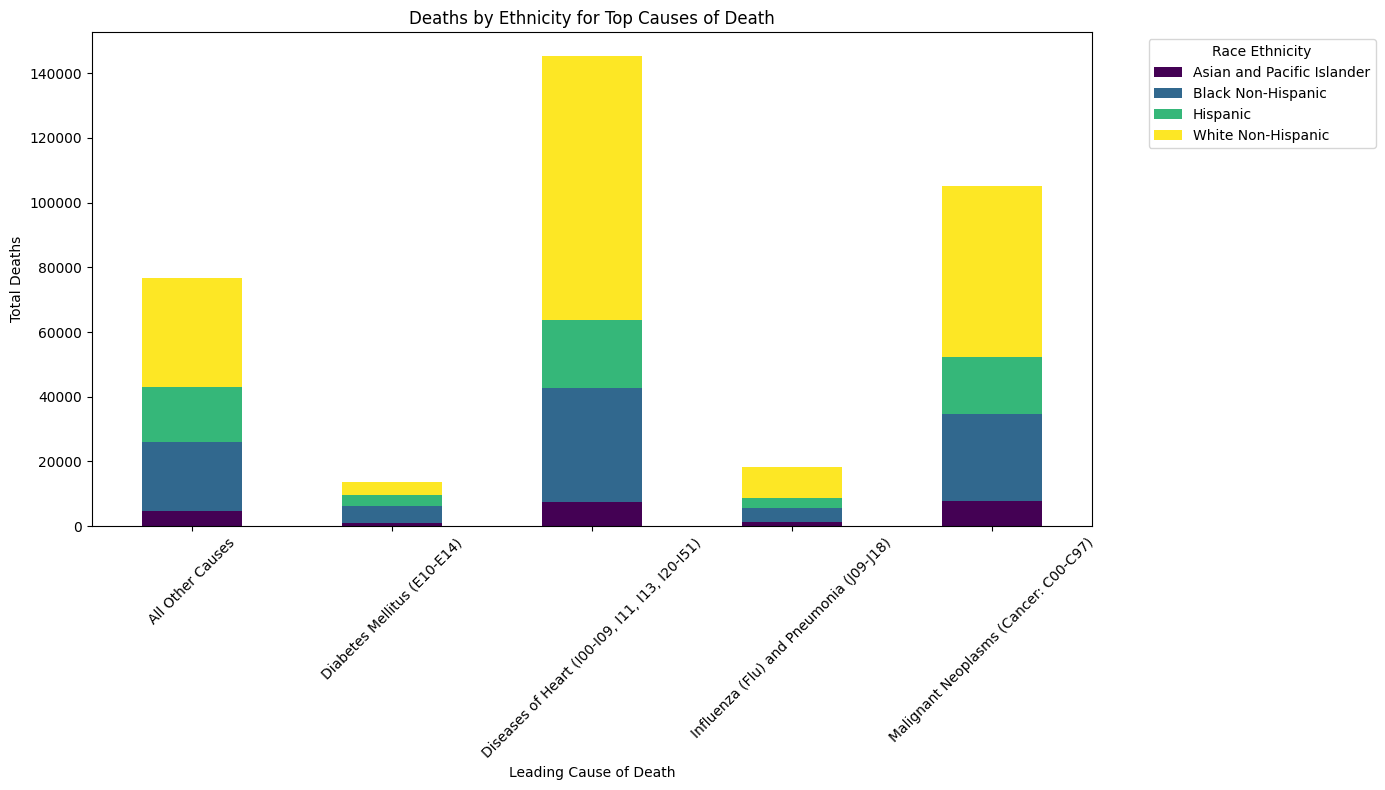

In [50]:
# First, ensure the 'Leading Cause' column exists in the dataframe
print(df.columns)

# If the 'Leading Cause' column exists, you can continue with:
# Calculating the total deaths for each leading cause
cause_totals = df.groupby('Leading Cause')['Deaths'].sum().sort_values(ascending=False)

# Selecting the top 5 causes
top_causes = cause_totals.head(5).index

# Filtering the main dataframe for these top causes
df_top_causes = df[df['Leading Cause'].isin(top_causes)]

# Grouping by 'Leading Cause' and 'Race Ethnicity' and calculating the total deaths
ethnicity_cause_group = df_top_causes.groupby(['Leading Cause', 'Race Ethnicity'])['Deaths'].sum().unstack().fillna(0)

# Print to verify the pivot table is correct
print(ethnicity_cause_group)

# Creating the stacked bar chart for Deaths by Ethnicity for Top Causes
ethnicity_cause_group.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')
plt.title('Deaths by Ethnicity for Top Causes of Death')
plt.xlabel('Leading Cause of Death')
plt.ylabel('Total Deaths')
plt.xticks(rotation=45)
plt.legend(title='Race Ethnicity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**6.Histogram of Death Rates**
* This histogram will help us see the frequency distribution of death rates, providing insights into how many causes result in high, medium, or low death rates.

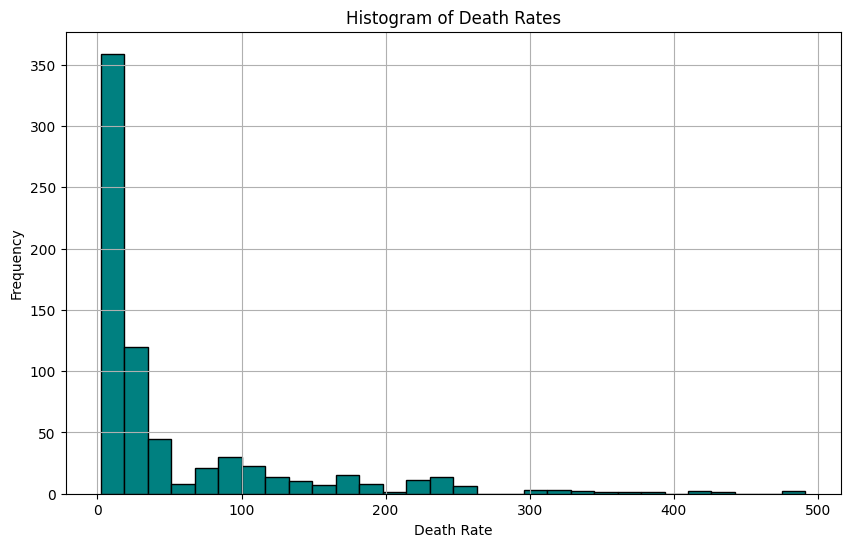

In [49]:
# Creating the histogram for the distribution of Death Rates
plt.figure(figsize=(10, 6))
plt.hist(df['Death Rate'], bins=30, color='teal', edgecolor='black')
plt.title('Histogram of Death Rates')
plt.xlabel('Death Rate')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
